In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from scipy.stats import zscore
from scipy.stats import skew, kurtosis
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('/Users/shubhangimallik/Downloads/RAW_recipes.csv')

In [3]:
df

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
...,...,...,...,...,...,...,...,...,...,...,...,...
231632,zydeco soup,486161,60,227978,2012-08-29,"['ham', '60-minutes-or-less', 'time-to-make', ...","[415.2, 26.0, 34.0, 26.0, 44.0, 21.0, 15.0]",7,"['heat oil in a 4-quart dutch oven', 'add cele...",this is a delicious soup that i originally fou...,"['celery', 'onion', 'green sweet pepper', 'gar...",22
231633,zydeco spice mix,493372,5,1500678,2013-01-09,"['15-minutes-or-less', 'time-to-make', 'course...","[14.8, 0.0, 2.0, 58.0, 1.0, 0.0, 1.0]",1,['mix all ingredients together thoroughly'],this spice mix will make your taste buds dance!,"['paprika', 'salt', 'garlic powder', 'onion po...",13
231634,zydeco ya ya deviled eggs,308080,40,37779,2008-06-07,"['60-minutes-or-less', 'time-to-make', 'course...","[59.2, 6.0, 2.0, 3.0, 6.0, 5.0, 0.0]",7,"['in a bowl , combine the mashed yolks and may...","deviled eggs, cajun-style","['hard-cooked eggs', 'mayonnaise', 'dijon must...",8
231635,cookies by design cookies on a stick,298512,29,506822,2008-04-15,"['30-minutes-or-less', 'time-to-make', 'course...","[188.0, 11.0, 57.0, 11.0, 7.0, 21.0, 9.0]",9,['place melted butter in a large mixing bowl a...,"i've heard of the 'cookies by design' company,...","['butter', 'eagle brand condensed milk', 'ligh...",10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB


In [5]:
df.describe()

,id,minutes,contributor_id,n_steps,n_ingredients
count,231637.000000,2.316370e+05,2.316370e+05,231637.000000,231637.000000
mean,222014.708984,9.398546e+03,5.534885e+06,9.765499,9.051153
std,141206.635626,4.461963e+06,9.979141e+07,5.995128,3.734796
min,38.000000,0.000000e+00,2.700000e+01,0.000000,1.000000
25%,99944.000000,2.000000e+01,5.690500e+04,6.000000,6.000000
50%,207249.000000,4.000000e+01,1.736140e+05,9.000000,9.000000
75%,333816.000000,6.500000e+01,3.982750e+05,12.000000,11.000000
max,537716.000000,2.147484e+09,2.002290e+09,145.000000,43.000000


In [6]:
df.drop(['description', 'steps', 'submitted'], axis=1, inplace=True)

In [7]:
df.head()

,name,id,minutes,contributor_id,tags,nutrition,n_steps,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,"['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [10]:
df.isnull().sum()

name              1
id                0
minutes           0
contributor_id    0
tags              0
nutrition         0
n_steps           0
ingredients       0
n_ingredients     0
dtype: int64

In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

name              0
id                0
minutes           0
contributor_id    0
tags              0
nutrition         0
n_steps           0
ingredients       0
n_ingredients     0
dtype: int64

In [14]:
#seperate the information from nutrition column
df['nutrition'] = df['nutrition'].str.replace('[', '').str.replace(']', '')

/var/folders/gt/w3wx215x3cz608s_pxx7zkpr0000gn/T/ipykernel_90744/1030893769.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['nutrition'] = df['nutrition'].str.replace('[', '').str.replace(']', '')


In [15]:
NutriList=['Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']

To summarize, this line of code takes the 'nutrition' column from the DataFrame df2, applies the eval function to each element to convert the string representation of nutritional information into actual Python dictionaries or expressions, then constructs a new DataFrame (NutriList_Columns) with the converted nutritional information as columns. The index of the new DataFrame is kept the same as the index of df2, and the columns are named according to the list stored in the variable NutriList

In [17]:
NutriList_Columns = pd.DataFrame(df['nutrition'].apply(eval).to_list(), index=df.index, columns=NutriList)

In [18]:
NutriList_Columns

,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs
0,51.5,0.0,13.0,0.0,2.0,0.0,4.0
1,173.4,18.0,0.0,17.0,22.0,35.0,1.0
2,269.8,22.0,32.0,48.0,39.0,27.0,5.0
3,368.1,17.0,10.0,2.0,14.0,8.0,20.0
4,352.9,1.0,337.0,23.0,3.0,0.0,28.0
...,...,...,...,...,...,...,...
231632,415.2,26.0,34.0,26.0,44.0,21.0,15.0
231633,14.8,0.0,2.0,58.0,1.0,0.0,1.0
231634,59.2,6.0,2.0,3.0,6.0,5.0,0.0
231635,188.0,11.0,57.0,11.0,7.0,21.0,9.0


In [20]:
df=df.join(NutriList_Columns)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231636 entries, 0 to 231636
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            231636 non-null  object 
 1   id              231636 non-null  int64  
 2   minutes         231636 non-null  int64  
 3   contributor_id  231636 non-null  int64  
 4   tags            231636 non-null  object 
 5   nutrition       231636 non-null  object 
 6   n_steps         231636 non-null  int64  
 7   ingredients     231636 non-null  object 
 8   n_ingredients   231636 non-null  int64  
 9   Calories        231636 non-null  float64
 10  Total_fat       231636 non-null  float64
 11  Sugar           231636 non-null  float64
 12  Sodium          231636 non-null  float64
 13  Protein         231636 non-null  float64
 14  Saturated_fat   231636 non-null  float64
 15  Carbs           231636 non-null  float64
dtypes: float64(7), int64(5), object(4)
memory usage: 38.1+ MB


In [23]:
df.drop('nutrition', axis=1, inplace=True)

In [25]:
# Check for duplicate rows, excluding the 'id' column as 'id' column is a unique identifier for each recipe
duplicate_rows = df.duplicated(subset=df.columns.difference(['id'])) 

In [26]:
# Count the number of duplicate rows and there is no duplicate rows. No need to drop duplicatets
num_duplicate_rows = duplicate_rows.sum() 
num_duplicate_rows

0

In [27]:
numerical_columns = ['minutes', 'n_steps', 'n_ingredients', 'Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat', 'Carbs']

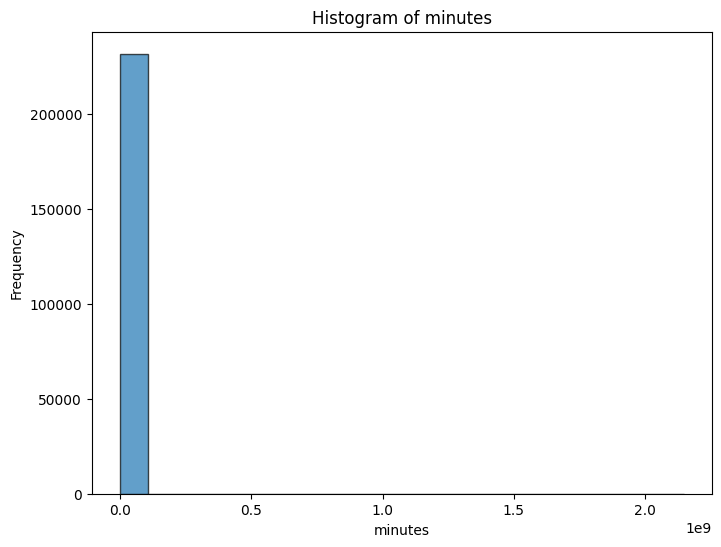

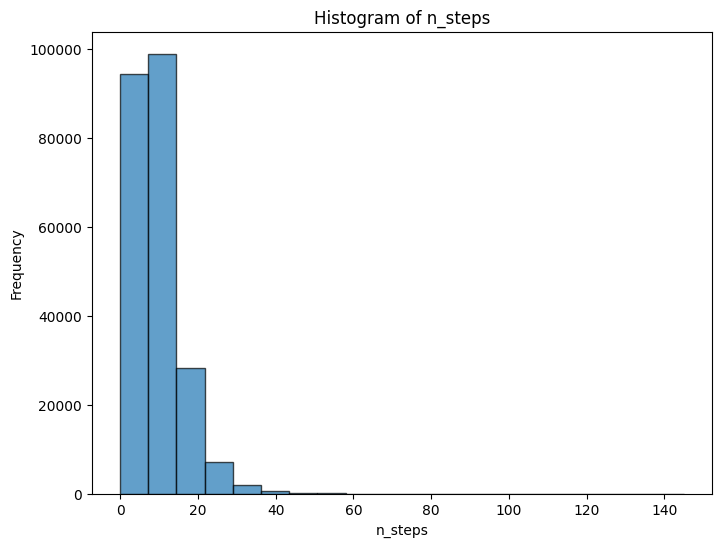

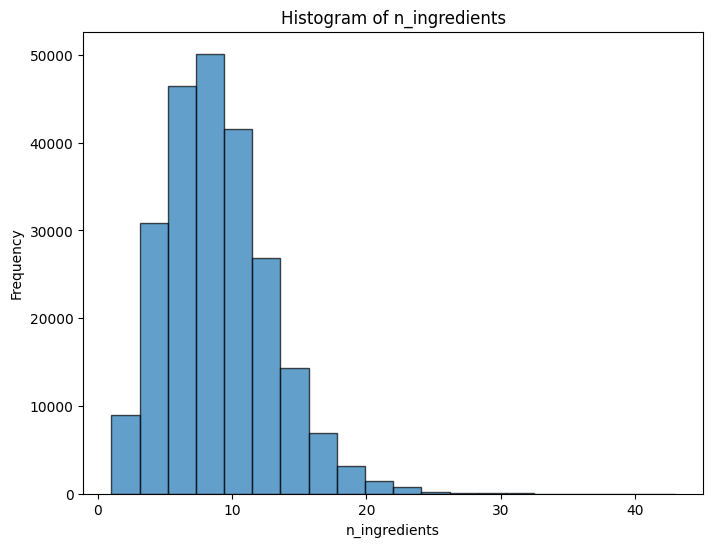

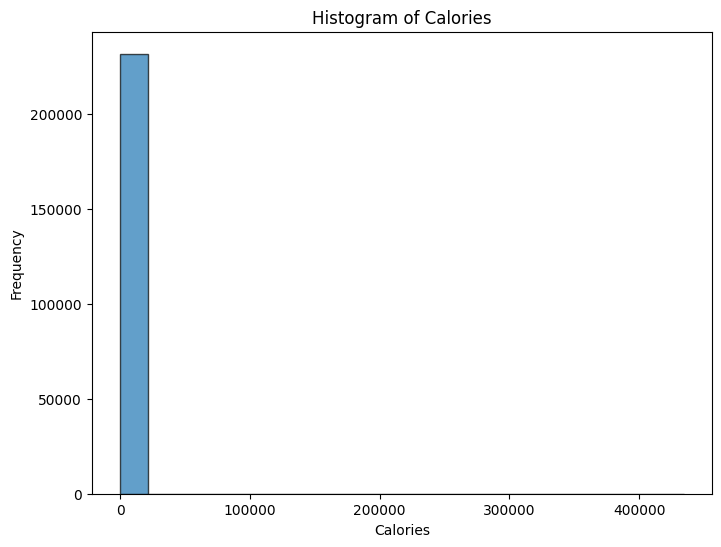

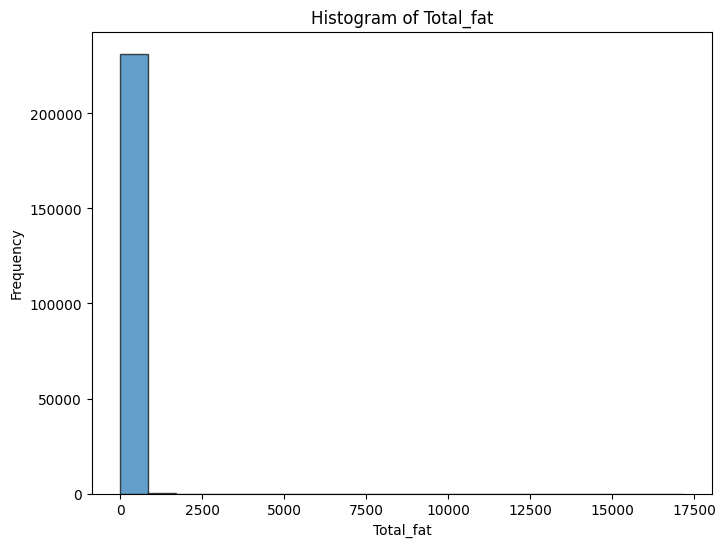

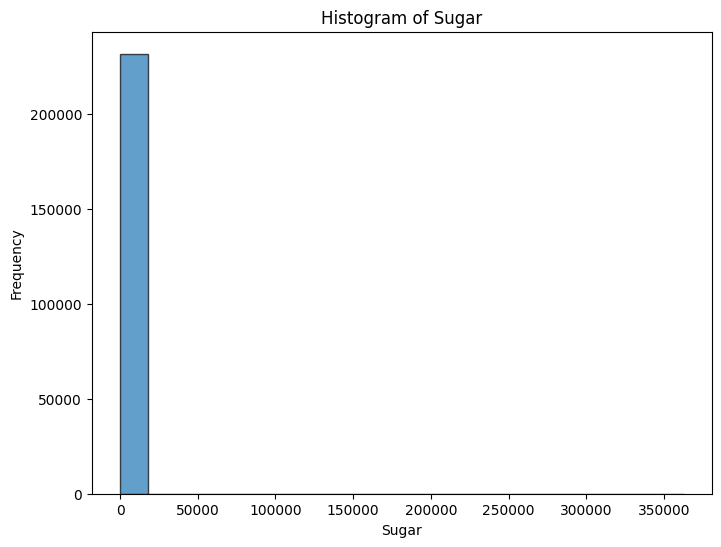

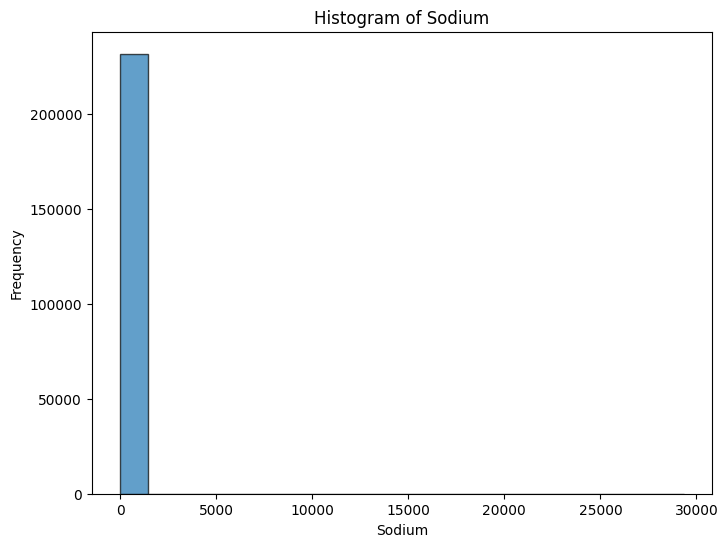

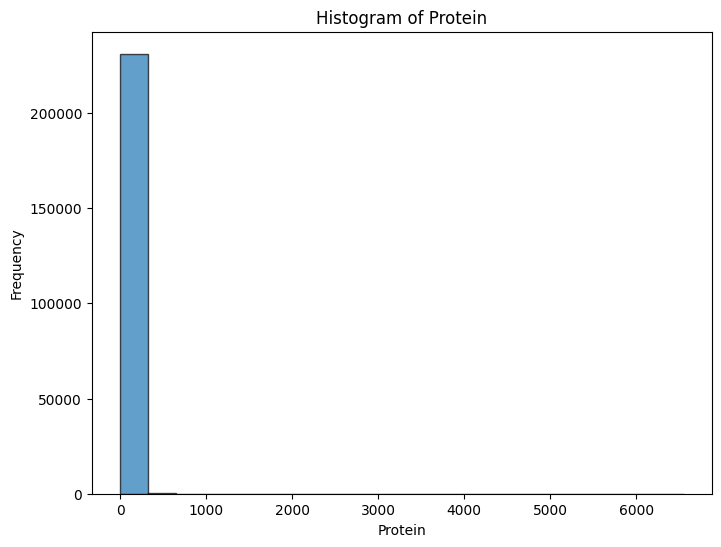

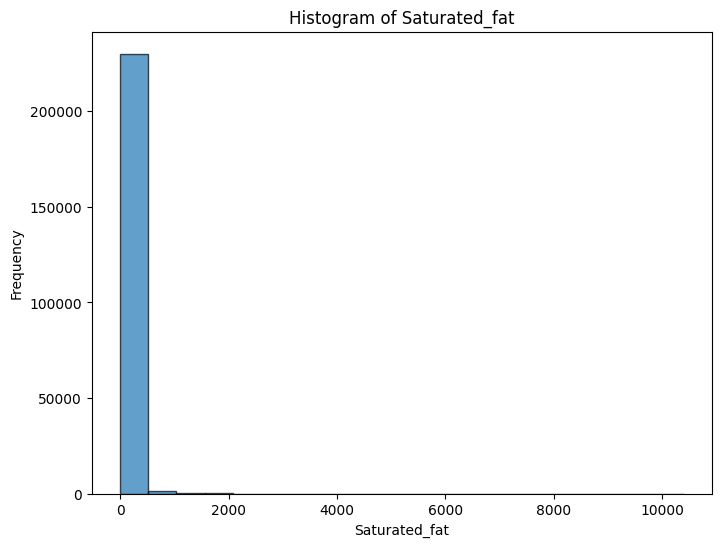

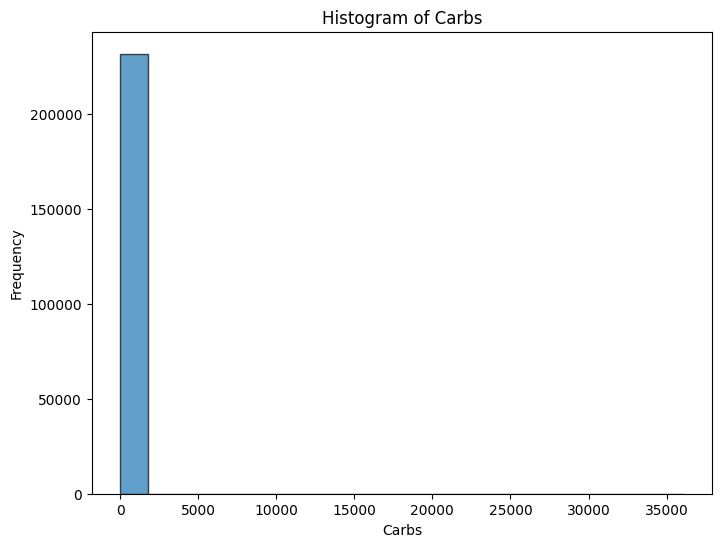

In [29]:
# plot the histogram fo reach numerical columns so we can better make decisions on dropping outliers

# Set the number of bins for the histogram
num_bins = 20

# Plot histograms for each numerical column and see their skewness and tailness visually, added alpha feature here as not adding this feature will help the graphs display distribution precisely.
for column in numerical_columns:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as per your preference
    plt.hist(df[column], bins=num_bins, edgecolor='black', alpha=0.7)  # Added transparency
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

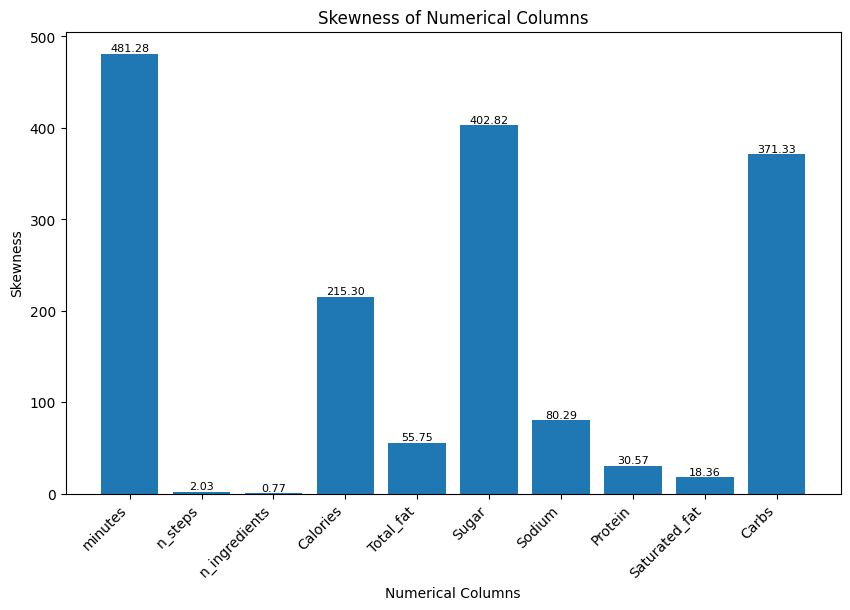

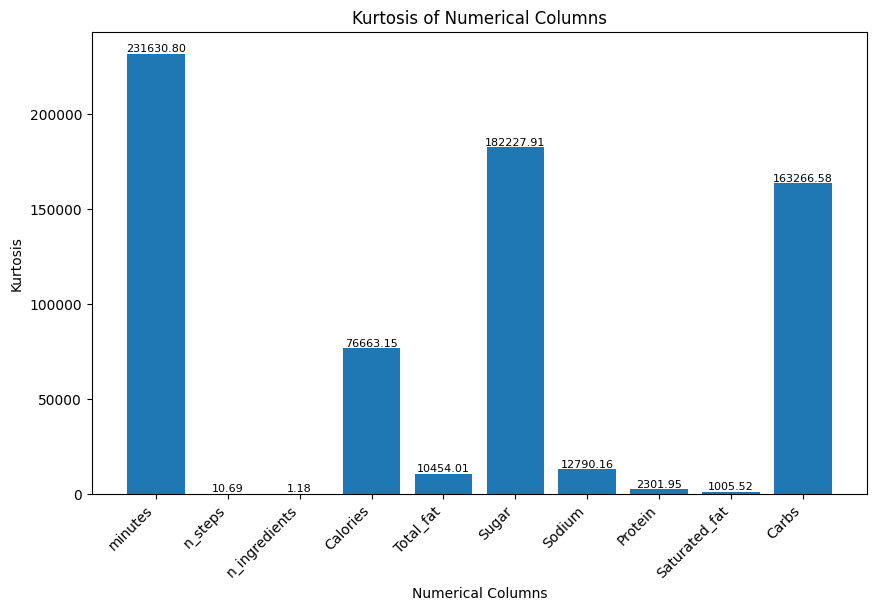

In [31]:
# Another version, we combined all the numerical value in two graphs with each skweness value and kurtosis value in each column for easy interpretation.

# Calculate skewness and kurtosis for each numerical column
skewness_list = [skew(df[column].dropna()) for column in numerical_columns]
kurtosis_list = [kurtosis(df[column].dropna()) for column in numerical_columns]

# Plot the graph for skewness
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, skewness_list)
plt.title('Skewness of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Skewness')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and skewness value
for i, v in enumerate(skewness_list):
    plt.text(i, v, f'{skewness_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()

# Plot the graph for kurtosis
plt.figure(figsize=(10, 6))
plt.bar(numerical_columns, kurtosis_list)
plt.title('Kurtosis of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Kurtosis')
plt.xticks(rotation=45, ha='right')

# Label each bar with the column name and kurtosis value
for i, v in enumerate(kurtosis_list):
    plt.text(i, v, f'{kurtosis_list[i]:.2f}', ha='center', va='bottom', fontsize=8)

plt.show()


In [33]:
# Calculate skewness and kurtosis for each numerical column, this time, we choose to display them in text format.
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

minutes: skewness = 481.2823465163429, kurtosis = 231630.79800722623
n_steps: skewness = 2.0337605792533675, kurtosis = 10.685327456440167
n_ingredients: skewness = 0.7680467823090827, kurtosis = 1.1757137508203792
Calories: skewness = 215.30154614397648, kurtosis = 76663.14765475626
Total_fat: skewness = 55.750365807856305, kurtosis = 10454.01228357135
Sugar: skewness = 402.8229591861608, kurtosis = 182227.91262881464
Sodium: skewness = 80.29392236264621, kurtosis = 12790.159403332864
Protein: skewness = 30.56855422352877, kurtosis = 2301.946887949268
Saturated_fat: skewness = 18.364533245640565, kurtosis = 1005.5164806404593
Carbs: skewness = 371.33133437253184, kurtosis = 163266.57845680957


In [37]:
#based on skewness and kurtosis, we use z score to remove outliers
if abs(s) > 1:
        df[column] = df[column].apply(lambda x: np.log(x + 1))

In [38]:
z_scores = zscore(df[numerical_columns])

In [39]:
threshold = 3

In [40]:
df = df[(np.abs(z_scores) < threshold).all(axis=1)]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221369 entries, 0 to 231636
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            221369 non-null  object 
 1   id              221369 non-null  int64  
 2   minutes         221369 non-null  int64  
 3   contributor_id  221369 non-null  int64  
 4   tags            221369 non-null  object 
 5   n_steps         221369 non-null  int64  
 6   ingredients     221369 non-null  object 
 7   n_ingredients   221369 non-null  int64  
 8   Calories        221369 non-null  float64
 9   Total_fat       221369 non-null  float64
 10  Sugar           221369 non-null  float64
 11  Sodium          221369 non-null  float64
 12  Protein         221369 non-null  float64
 13  Saturated_fat   221369 non-null  float64
 14  Carbs           221369 non-null  float64
dtypes: float64(7), int64(5), object(3)
memory usage: 27.0+ MB


In [43]:
# After we removing the outlier, we can see that the value of skewness and Kurtosis had changed significantly.
for column in numerical_columns:
    skewness_values = []
    s = skew(df[column])
    k = kurtosis(df[column])
    print(f'{column}: skewness = {s}, kurtosis = {k}')

minutes: skewness = 236.57754323936095, kurtosis = 78902.4153748345
n_steps: skewness = 0.8975109079514012, kurtosis = 0.6722652195178322
n_ingredients: skewness = 0.48430297108658255, kurtosis = -0.05893856331816405
Calories: skewness = 3.151082479419224, kurtosis = 15.840405751926632
Total_fat: skewness = 2.59245615366079, kurtosis = 9.644726064842937
Sugar: skewness = 6.454126108027903, kurtosis = 58.659267003530125
Sodium: skewness = 4.009571898617293, kurtosis = 26.779856458361188
Protein: skewness = 1.644014380538964, kurtosis = 3.0356426375892775
Saturated_fat: skewness = 2.558593170875437, kurtosis = 9.070783480544955
Carbs: skewness = -0.17254741142709434, kurtosis = 0.09665714403169412


In [45]:
# we did descriptive analysis here, and we found that the difference of mean value and std from number of ingredients and sugar is siginificant larger than other variables,
# likewise there're might be other variables which have similar distribution like these two.
descriptive_stats = df.describe()
print(descriptive_stats)

                  id       minutes  contributor_id        n_steps   
count  221369.000000  2.213690e+05    2.213690e+05  221369.000000  \
mean   222291.802466  1.168995e+02    5.103905e+06       9.322073   
std    140731.177549  2.906413e+03    9.549022e+07       5.017437   
min        38.000000  0.000000e+00    2.700000e+01       0.000000   
25%    100796.000000  2.000000e+01    5.704200e+04       6.000000   
50%    208083.000000  3.500000e+01    1.755740e+05       8.000000   
75%    333538.000000  6.500000e+01    4.007080e+05      12.000000   
max    537716.000000  1.051200e+06    2.002285e+09      27.000000   

       n_ingredients       Calories      Total_fat          Sugar   
count  221369.000000  221369.000000  221369.000000  221369.000000  \
mean        8.896453     392.891664      28.956024      63.539032   
std         3.507942     363.972938      32.589246     134.348289   
min         1.000000       0.000000       0.000000       0.000000   
25%         6.000000     169.9000

In [46]:
#From here, we will calculate the VIF score
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant 
df_with_constant = add_constant(df)

In [47]:
numeric_cols = df_with_constant.select_dtypes(include=[np.number]) 

In [48]:
vif = pd.DataFrame() 
vif["variables"] = numeric_cols.columns 
vif["VIF"] = [variance_inflation_factor(numeric_cols.values, i) for i in range(numeric_cols.shape[1])] 
print(vif)

         variables        VIF
0            const  14.261897
1               id   1.019583
2          minutes   1.002120
3   contributor_id   1.012595
4          n_steps   1.253337
5    n_ingredients   1.323669
6         Calories  12.380996
7        Total_fat   7.975980
8            Sugar   2.721978
9           Sodium   1.450233
10         Protein   2.515173
11   Saturated_fat   3.857199
12           Carbs   2.242619


In [49]:
#Explanation of the VIF scores
#n_steps VIF is 1.25 which means thee is no corrrelation
#n_ingredients is 1.32 means little correlation
#calories is 12.38 means highly correlated
#total fat 7.97 means moderately correlated
#sugar is 2.72 means moderately correlated
#sodium is 1.45 means little to no correlation
#protein is 2.51 means moderately correlated
#saturated_fat is 3.86 means moderately correlated
#cards is 2.25 means moderately correlatted

In [50]:
def get_difficulty_level(row):
    steps = row['n_steps']
    minutes = row['minutes']

    if steps <= 10 and minutes<=60:
        return 'Low'
    elif 5 < steps <= 50 and 60 < minutes < 1500:
        return 'Medium'
    else:
        return 'High'

df['difficulty_level'] = df.apply(get_difficulty_level, axis=1)
df['difficulty_level']

0           High
1            Low
2         Medium
3           High
4           High
           ...  
231631      High
231633       Low
231634       Low
231635       Low
231636       Low
Name: difficulty_level, Length: 221369, dtype: object

In [52]:
def is_vegan(tags):
    if 'vegan' in tags:
        return 1
    else:
        return 0
 
df['is_vegan'] = df['tags'].apply(is_vegan)

In [53]:
def is_gluten_free(tags):
    if 'gluten-free' in tags:
        return 1
    else:
        return 0
 
df['is_gluten_free'] = df['tags'].apply(is_gluten_free)

In [54]:
df

,name,id,minutes,contributor_id,tags,n_steps,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,difficulty_level,is_vegan,is_gluten_free
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,1.609438,High,0,0
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,0.693147,Low,0,0
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,1.791759,Medium,0,0
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,3.044522,High,0,0
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,3.367296,High,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,zydeco shrimp wrap,188810,57,37779,"['60-minutes-or-less', 'time-to-make', 'course...",14,"['white rice', 'vegetable oil', 'onion', 'gree...",11,482.6,13.0,25.0,37.0,33.0,9.0,3.332205,High,0,0
231633,zydeco spice mix,493372,5,1500678,"['15-minutes-or-less', 'time-to-make', 'course...",1,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,0.693147,Low,1,0
231634,zydeco ya ya deviled eggs,308080,40,37779,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.000000,Low,0,0
231635,cookies by design cookies on a stick,298512,29,506822,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,2.302585,Low,0,0


In [56]:
 # minutes bins: 0-500, 501-1000, 1001-1500, 1501-3000
bins = [0,501,1001,1501,3000]
labels = ['0-500','501-1000', '1001-1500', '1501-3000']
df['Minutes_bins'] = pd.cut(df['minutes'], bins=bins, labels=labels, right=False)

In [57]:
df.dropna(how='any',inplace=True)

In [58]:
df

,name,id,minutes,contributor_id,tags,n_steps,ingredients,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,difficulty_level,is_vegan,is_gluten_free,Minutes_bins
0,arriba baked winter squash mexican style,137739,55,47892,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['winter squash', 'mexican seasoning', 'mixed ...",7,51.5,0.0,13.0,0.0,2.0,0.0,1.609438,High,0,0,0-500
1,a bit different breakfast pizza,31490,30,26278,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['prepared pizza crust', 'sausage patty', 'egg...",6,173.4,18.0,0.0,17.0,22.0,35.0,0.693147,Low,0,0,0-500
2,all in the kitchen chili,112140,130,196586,"['time-to-make', 'course', 'preparation', 'mai...",6,"['ground beef', 'yellow onions', 'diced tomato...",13,269.8,22.0,32.0,48.0,39.0,27.0,1.791759,Medium,0,0,0-500
3,alouette potatoes,59389,45,68585,"['60-minutes-or-less', 'time-to-make', 'course...",11,"['spreadable cheese with garlic and herbs', 'n...",11,368.1,17.0,10.0,2.0,14.0,8.0,3.044522,High,0,0,0-500
4,amish tomato ketchup for canning,44061,190,41706,"['weeknight', 'time-to-make', 'course', 'main-...",5,"['tomato juice', 'apple cider vinegar', 'sugar...",8,352.9,1.0,337.0,23.0,3.0,0.0,3.367296,High,0,0,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,zydeco shrimp wrap,188810,57,37779,"['60-minutes-or-less', 'time-to-make', 'course...",14,"['white rice', 'vegetable oil', 'onion', 'gree...",11,482.6,13.0,25.0,37.0,33.0,9.0,3.332205,High,0,0,0-500
231633,zydeco spice mix,493372,5,1500678,"['15-minutes-or-less', 'time-to-make', 'course...",1,"['paprika', 'salt', 'garlic powder', 'onion po...",13,14.8,0.0,2.0,58.0,1.0,0.0,0.693147,Low,1,0,0-500
231634,zydeco ya ya deviled eggs,308080,40,37779,"['60-minutes-or-less', 'time-to-make', 'course...",7,"['hard-cooked eggs', 'mayonnaise', 'dijon must...",8,59.2,6.0,2.0,3.0,6.0,5.0,0.000000,Low,0,0,0-500
231635,cookies by design cookies on a stick,298512,29,506822,"['30-minutes-or-less', 'time-to-make', 'course...",9,"['butter', 'eagle brand condensed milk', 'ligh...",10,188.0,11.0,57.0,11.0,7.0,21.0,2.302585,Low,0,0,0-500


In [60]:
minutes_bin = pd.get_dummies(df['Minutes_bins'], dtype=int)

In [62]:
bin_edges = [0, 10, 20, 30, 40, float('inf')]  
 
bin_labels = ['0-9', '10-19', '20-29', '30-39', '40+']
 
# Create the 'ingredients_bins' column based on 'n_ingredients' column
df['ingredients_bins'] = pd.cut(df['n_ingredients'], bins=bin_edges, labels=bin_labels, right=False)
 
# Print the updated dataset
print(df[['n_ingredients', 'ingredients_bins']])

        n_ingredients ingredients_bins
0                   7              0-9
1                   6              0-9
2                  13            10-19
3                  11            10-19
4                   8              0-9
...               ...              ...
231631             11            10-19
231633             13            10-19
231634              8              0-9
231635             10            10-19
231636              7              0-9

[220962 rows x 2 columns]


In [64]:
ingredients_bin = pd.get_dummies(df['ingredients_bins'], dtype=int)

In [65]:
thresholds = {
    'Calories': 560,
    'Total_fat': 20,
    'Sugar': 10,
    'Sodium': 600,
    'Protein': 15,
    'Saturated_fat': 6,
    'Carbs': 80
}
 
# Function to classify as healthy or unhealthy
def classify(row):
    is_healthy = all(row[key] < threshold for key, threshold in thresholds.items())
    return 1 if is_healthy else 0
 
# Apply classification to the dataset
df['is_healthy'] = df.apply(classify, axis=1)

In [67]:
new_df = pd.concat([df[['n_steps',
 'n_ingredients',
 'Calories',
 'Total_fat',
 'Sugar',
 'Sodium',
 'Protein',
 'Saturated_fat',
 'Carbs','ingredients_bins','Minutes_bins','difficulty_level', 'is_vegan', 'is_gluten_free', 'minutes']],minutes_bin, ingredients_bin, df['is_healthy']],axis=1)

In [68]:
new_df

,n_steps,n_ingredients,Calories,Total_fat,Sugar,Sodium,Protein,Saturated_fat,Carbs,ingredients_bins,...,0-500,501-1000,1001-1500,1501-3000,0-9,10-19,20-29,30-39,40+,is_healthy
0,11,7,51.5,0.0,13.0,0.0,2.0,0.0,1.609438,0-9,...,1,0,0,0,1,0,0,0,0,0
1,9,6,173.4,18.0,0.0,17.0,22.0,35.0,0.693147,0-9,...,1,0,0,0,1,0,0,0,0,0
2,6,13,269.8,22.0,32.0,48.0,39.0,27.0,1.791759,10-19,...,1,0,0,0,0,1,0,0,0,0
3,11,11,368.1,17.0,10.0,2.0,14.0,8.0,3.044522,10-19,...,1,0,0,0,0,1,0,0,0,0
4,5,8,352.9,1.0,337.0,23.0,3.0,0.0,3.367296,0-9,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231631,14,11,482.6,13.0,25.0,37.0,33.0,9.0,3.332205,10-19,...,1,0,0,0,0,1,0,0,0,0
231633,1,13,14.8,0.0,2.0,58.0,1.0,0.0,0.693147,10-19,...,1,0,0,0,0,1,0,0,0,1
231634,7,8,59.2,6.0,2.0,3.0,6.0,5.0,0.000000,0-9,...,1,0,0,0,1,0,0,0,0,1
231635,9,10,188.0,11.0,57.0,11.0,7.0,21.0,2.302585,10-19,...,1,0,0,0,0,1,0,0,0,0


In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 220962 entries, 0 to 231636
Data columns (total 25 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   n_steps           220962 non-null  int64   
 1   n_ingredients     220962 non-null  int64   
 2   Calories          220962 non-null  float64 
 3   Total_fat         220962 non-null  float64 
 4   Sugar             220962 non-null  float64 
 5   Sodium            220962 non-null  float64 
 6   Protein           220962 non-null  float64 
 7   Saturated_fat     220962 non-null  float64 
 8   Carbs             220962 non-null  float64 
 9   ingredients_bins  220962 non-null  category
 10  Minutes_bins      220962 non-null  category
 11  difficulty_level  220962 non-null  object  
 12  is_vegan          220962 non-null  int64   
 13  is_gluten_free    220962 non-null  int64   
 14  minutes           220962 non-null  int64   
 15  0-500             220962 non-null  int64   
 16  501-100

In [70]:
cat_columns = ['ingredients_bins','Minutes_bins','difficulty_level','is_vegan','is_gluten_free']
num_columns = ['minutes','n_steps','n_ingredients','Calories', 'Total_fat', 'Sugar', 'Sodium', 'Protein', 'Saturated_fat','Carbs']
target = 'is_healthy'

In [71]:
X_train, X_test, y_train, y_test = train_test_split(new_df[cat_columns + num_columns], new_df[target], test_size=0.2, random_state=123)

In [72]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [73]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, cat_columns),
                                                 ('num', num_transformer, num_columns)])

In [74]:
log = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svc = SVC()

In [75]:
knn_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', knn)
])

In [76]:
log_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', log)
])


In [77]:
nb_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', nb)
])

In [78]:
svc_pipeline = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('classifier', svc)
])

In [79]:
y_train.shape

(176769,)

In [80]:
y_test.shape

(44193,)

In [81]:
x_train_transformed = preprocessor.fit_transform(X_train)
x_test_transformed = preprocessor.fit_transform(X_test)

In [82]:
x_train_transformed.shape

(176769, 24)

In [83]:
x_test_transformed.shape

(44193, 24)

In [84]:
log_pipeline.fit(X_train, y_train)
nb_pipeline.fit(X_train, y_train)
knn_pipeline.fit(X_train, y_train)
svc_pipeline.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ingredients_bins',
                                                   'Minutes_bins',
                                                   'difficulty_level',
                                                   'is_vegan',
                                                   'is_gluten_free']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['minutes', 'n_steps',
                                                   'n_ingredients', 'Calories',
                                                   'Total_fat', 'Sugar',
                                                   'Sodium', 'Protein',
                                                   'Saturated_fat',
                                                   'Carbs'])])),
                ('classifier', SVC())])

In [85]:
pred_log = log_pipeline.predict(X_test)
pred_knn = knn_pipeline.predict(X_test)
pred_nb = nb_pipeline.predict(X_test)
pred_svc = svc_pipeline.predict(X_test)

In [86]:
print(f1_score(pred_log, y_test))
print(f1_score(pred_nb, y_test))
print(f1_score(pred_knn, y_test))
print(f1_score(pred_svc, y_test))

0.8533333333333334
0.6968576709796673
0.6458185264155414
0.8395967002749771


In [87]:
print(recall_score(pred_log, y_test))
print(recall_score(pred_nb, y_test))
print(recall_score(pred_knn, y_test))
print(recall_score(pred_svc, y_test))

0.8852005532503457
0.5436193222782985
0.7211640211640211
0.9011313330054107


In [88]:
print(precision_score(pred_log, y_test))
print(precision_score(pred_nb, y_test))
print(precision_score(pred_knn, y_test))
print(precision_score(pred_svc, y_test))

0.8236808236808236
0.9703989703989704
0.5847275847275847
0.7859287859287859


In [89]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'class_weight': [None, 'balanced'],
    'max_iter': [50, 100, 200]
}


In [90]:
rs_log = RandomizedSearchCV(log, param_distributions=param_grid, cv=5)

In [91]:
rs_log.fit(x_train_transformed,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000],
                                        'class_weight': [None, 'balanced'],
                                        'max_iter': [50, 100, 200],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['liblinear', 'saga']})

In [92]:
rs_log.best_estimator_

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [93]:
log_best = LogisticRegression(C=0.1,max_iter=200,penalty='l1',solver='liblinear')

log_best.fit(x_train_transformed,y_train)
pred_best = log_best.predict(x_test_transformed)

In [94]:
print(f1_score(pred_best, y_test))

0.861458782908934


In [95]:
cv_scores = cross_val_score(log_best, x_train_transformed, y_train, cv=5, scoring='f1')

In [96]:
print("Cross-validation scores for Logistic Regression: ", cv_scores)

Cross-validation scores for Logistic Regression:  [0.87844408 0.85959568 0.87489868 0.87289517 0.86706457]


In [97]:
params = {'kernel':['linear','poly']}

In [98]:
rs_svc = RandomizedSearchCV(svc, param_distributions=params, cv=5)

In [99]:
rs_svc.fit(x_train_transformed,y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'kernel': ['linear', 'poly']})

In [100]:
rs_svc.best_estimator_

SVC(kernel='linear')

In [101]:
svc_best = SVC(kernel='linear')

svc_best.fit(x_train_transformed,y_train)
pred_best_svc = svc_best.predict(x_test_transformed)

In [102]:
print(f1_score(pred_best_svc, y_test))

0.8619865246685503


In [103]:
cv_scores = cross_val_score(svc_best, x_train_transformed, y_train, cv=5, scoring='f1')